In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ToyAnalysis import grid_fit as gf

# General features

Before creating a grid to fit different parameters to the data of a particular experiment (by now only MiniBooNE fitting is available), you can set the default values of the couplings and mixing elements that will be use to generate the events using DarkNews:

In [4]:
gf.UD4_def = 1.0/np.sqrt(2.)
gf.UD5_def = 1.0/np.sqrt(2.)
gf.gD_def = 2.
gf.Umu4_def = np.sqrt(1.0e-12)
gf.Umu5_def = np.sqrt(1.0e-12)
gf.epsilon_def = 8e-4

# Obtain dataframe with events analyzed and filtered by decay

__Keyword arguments:__
* model='3+1',model to use
* exp='miniboone_fhc', experiment
* neval=100000, number of evaluations for Vegas
* HNLtype="dirac", type of HNL
* mzprime=1.25
* m4=0.8
* m5=1.0
* UD4=UD4_def
* UD5=UD5_def
* Umu4=Umu4_def
* Umu5=Umu5_def
* gD=gD_def
* epsilon=epsilon_def

In [5]:
# runnning one example point
_ = gf.get_events_df(model='3+1', mzprime=0.2, m4=0.5, neval=1000, loglevel='ERROR')

# Generate grid for mass vs mass

## 1. Create grid

In [9]:
example_3p1 = gf.grid_analysis(model='3+1',
                                exp='miniboone_fhc', 
                                HNLtype="dirac",
                                x_label='mzprime',
                                y_label='m4',
                                x_range=(0.02,10,4),
                                y_range=(0.01,2,4),
                                neval=100,
                                cores=4)

The keyword arguments you can pass are the following: (the first element shown is the default)

* model='3+1' or '3+2'

* exp='miniboone_fhc'

* neval=100000, number of evaluations for Vegas

* HNLtype="dirac" or "majorana"

* x_label='mzprime', "m4", "m5" or "delta", parameter for the x axis of the grid

* y_label='m4',mzprime', "m5" or "delta", parameter for the y axis of the grid

* x_range=(0.02,10,10), the range used for the x axis of the grid, where the structure is (start,stop,number of points)

* y_range=(0.01,2,10), the range used for the y axis of the grid, where the structure is (start,stop,number of points)

* log_interval_x=True or False, if you want the x axis to be log distributed

* log_interval_y=True or False, same as the previous one, but for y axis 

* mzprime=None, if you want to set a particular value of mzprime, in case it is fixed

* m4=None, same as the previous option

* m5=None, same as the previous option

* delta=None, same as the previous option

* UmuN_max=1e-2, maximum value to consider for the mixing parameters when fitting

* UD4=UD4_def, value set to do the fitting, not the generation of events

* UD5=UD5_def, same as the previous one

* Umu4=Umu4_def, same as the previous one

* Umu5=Umu5_def, same as the previous one

* gD=gD_def, same as the previous one

* epsilon=8e-4, same as the previous one

* cores=1, number of cores to do the multiprocessing

* output_file=None, name of the file where the fitting results will be stored

## 2. Generate events for the grid

In [10]:
example_3p1.generate_events(location='data', loglevel='warning')

Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.


'Success!'

* 'location' is the folder where the generated events will be stored

## 3. Fit events generated for the grid
This will include smearing and decay filter

In [11]:
example_3p1.fit_events(location='data',location_fit='data_fitting')

* 'location' is the folder where the generated events will be stored
* 'location_fit' is the folder where the fitting results will be stored

## 4. Access the dataframe with all the results

In [28]:
example_3p1.df

,mzprime,m4,chi2,N_events,couplings,decay_length,sum_w_post_smearing,v_4i
0,0.02,0.01,31.80203,0.000007,0.000036,894379248569.871338,0.0,0.000051
1,0.1587,0.01,31.802031,0.0,0.000431,4196190296956843.0,0.0,0.00061
2,1.26,0.01,31.802031,0.0,0.010001,16822061147135735808.0,0.0,0.014143
3,0.02,0.05848,9.720949,547.266121,0.000041,0.343629,0.331543,0.000057
4,0.1587,0.05848,31.800873,0.011558,0.000526,547085512994.635315,0.0,0.000744
5,1.26,0.05848,31.801994,0.000375,0.010001,2381788874431773.0,0.0,0.014143
6,0.02,0.342,14.327638,473.275127,0.00018,0.001653,0.014561,0.000255
7,0.1587,0.342,11.144984,526.737248,0.002665,0.11816,0.000074,0.003769
8,1.26,0.342,31.659954,1.340201,0.010001,332774240833.909241,0.0,0.014143


## 5. Plot the fitting

__Keyword arguments:__
* leg_loc = 'lower left', position of the legends
* plot_path=False, path of the plot to save
* save=True or False, whether to save it or not
* title=False, title to put on the top of the plot. False means that you will use the default one
* x_limits=[False,(0,0)], [0]: whether to put limits to the values shown on the plot for the X axis. [1]: limits
* y_limits=[False,(0,0)], the same but for the Y axis

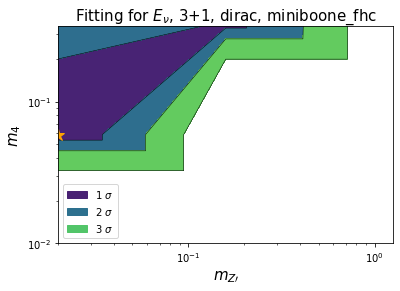

<Figure size 432x288 with 0 Axes>

In [31]:
example_3p1.plot()

# Generate grid for mass vs couplings

## 1. Create grid

In [16]:
example_3p1_coupling = gf.grid_analysis_couplings(model='3+1',exp='miniboone_fhc',neval=100000, HNLtype="dirac",x_label='m4', x_range=(0.02,2,8),coupling_range=(1e-3,1e-1,10),mzprime=0.8,cores=8)

The keyword arguments you can pass are the following: (the first element shown is the default)
* model='3+1' or '3+2'
* exp='miniboone_fhc'
* neval=100000, number of evaluations for Vegas
* HNLtype="dirac" or "majorana"
* x_label='mzprime', "m4", "m5" or "delta", parameter for the x axis of the grid. The couplings will be for the y axis
* x_range=(0.02,10,10), the range used for the x axis of the grid, where the structure is (start,stop,number of points)
* coupling_range=(0.01,2,10), the range used for the coupling axis of the grid, where the structure is (start,stop,number of points). For "3+1" it is |Umu4|, for "3+2", |Vmu5|
* log_interval_x=True or False, if you want the x axis to be log distributed
* log_interval_coupling=True or False, same as the previous one, but for y axis
* mzprime=None, if you want to set a particular value of mzprime, in case it is fixed
* m4=None, same as the previous option
* m5=None, same as the previous option
* delta=None, same as the previous option
* UD4=UD4_def, value set to do the fitting, not the generation of events
* UD5=UD5_def, same as the previous one
* Umu4=Umu4_def, same as the previous one
* Umu5=Umu5_def, same as the previous one
* gD=gD_def, same as the previous one
* epsilon=8e-4, same as the previous one
* cores=1, number of cores to do the multiprocessing
* output_file=None, name of the file where the fitting results will be stored

## 2. Generate events for the grid

In [6]:
example_3p1_coupling.generate_events(location='data')
clear_output(wait=False)

* 'location' is the folder where the generated events will be stored

## 3. Compute the $\chi^2$ for the events generated for the grid
This will include smearing and decay filter

In [17]:
example_3p1_coupling.fit_events(location='data',location_fit='data_fitting_coupling')

* 'location' is the folder where the generated events will be stored
* 'location_fit' is the folder where the fitting results will be stored

## 4. Access the dataframe with all the results

In [18]:
example_3p1_coupling.df

,m4,mzprime,decay_length,vmu4,Nevents,chi2,sum_w_post_smearing
0,0.02,0.8,83082443626.862167,0.001,0.0,31.802031,0.0
1,0.02,0.8,29861881583.532524,0.001668,0.0,31.802031,0.0
2,0.02,0.8,10727112835.870859,0.002783,0.0,31.802031,0.0
3,0.02,0.8,3855662302.68445,0.004642,0.000001,31.802031,0.0
4,0.02,0.8,1385768684.728235,0.007743,0.000011,31.80203,0.0
...,...,...,...,...,...,...,...
65,1.036,0.8,0.0,0.012921,0.007086,31.801965,0.0
66,1.036,0.8,0.0,0.021545,0.0197,31.801849,0.0
67,1.036,0.8,0.0,0.035963,0.054891,31.801525,0.0
68,1.036,0.8,0.0,0.060058,0.153081,31.80063,0.0


## 5. Plot the fitting

__Keyword arguments:__
* coupling_factor=1e6, the factor to multiply Y axis to have a better plot. The Y axis values will remain unchanged. This helps to have a better resolution. tricontourplot works better with values of O(1)
* leg_loc = 'lower left', position of the legends
* plot_path=False, path of the plot to save
* save=True or False, whether to save it or not
* title=False, title to put on the top of the plot. False means that you will use the default one
* x_limits=[False,(0,0)], [0]: whether to put limits to the values shown on the plot for the X axis. [1]: limits
* y_limits=[False,(0,0)], the same but for the Y axis

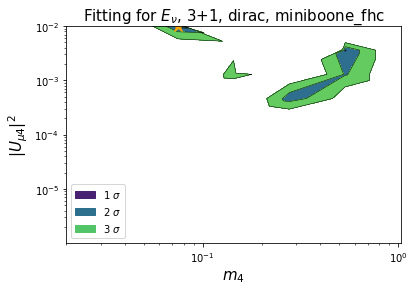

<Figure size 432x288 with 0 Axes>

In [28]:
example_3p1_coupling.plot(coupling_factor=1e5)